# <font color = 'color'>모두의 딥러닝: 16장(p.204)</font>

# <font color = 'blue'>문제 정의</font>

### 미국국립표준기술연구소 손글씨 숫자이미지 데이터셋(MINST Dataset)
* 분류(classification) 문제
* 흑백 손글씨 숫자이미지 특성을 통해 숫자이미지를 분류예측하는 문제상황
* Modified National Institute of Standards and Technology database
* 총 7만개: 훈련용(6만개), 테스트용(1만개)

<img src = './../../images/mnist.png'>

1. 피처(입력/예측/독립)변수
    * 흑백 손글씨 숫자이미지 픽셀특성((가로28 X 세로28 픽셀별 색상정보) <pre>
1. 타깃(출력/반응/종속)변수
    * 10개의 숫자이미지 범주(0 ~ 9)

# <font color = 'blue'>데이터 준비</font>

### 시각화 모듈로딩 및 한글폰트 작업

In [1]:
# 시각화 작업을 위한 모듈 로딩작업
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [2]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/nanumgothic.ttf").get_name()

# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 워닝메시지 출력관련 모듈로딩
import warnings

warnings.filterwarnings(action = 'ignore') 
# - 출력되는 경고메시지를 무시하고 숨김

# warnings.filterwarnings(action = 'default')
# - 다시 경고메시지가 나타나도록 함

### 관련 라이브러리 로딩

In [4]:
# 기본 범용라이브러리 로딩
import numpy as np
import pandas as pd

In [5]:
# 이미지 라이브러리 데이터셋 모듈 로딩
from keras.datasets import mnist

Using TensorFlow backend.


### (1) MNIST 데이터셋을 단일 객체로 로딩

In [6]:
# mnist에 들어 있는 데이터셋 전체를 data라는 단일객체로 로딩함
# 픽셀 정보를 로딩
data = mnist.load_data()

### 전체 MNIST 데이터셋

In [7]:
# 전체 데이터셋 형식과 규모
print('전체셋 형식:', type(data), '\n'
      '전체셋 규모:', len(data))
# - 튜플형식으로 요소가 2개
# - 첫번째 요소: 6만개의 훈련용셋(피처: 숫자이미지 픽셀특성, 타겟: 숫자이름표 범주) 
# - 두번째 요소: 1만개의 테스트용셋(피처: 숫자이미지 픽셀특성, 타겟: 숫자이름표 범주)

전체셋 형식: <class 'tuple'> 
전체셋 규모: 2


### 훈련 MNIST 데이터셋

In [8]:
# 훈련 데이터셋 형식과 규모
print('훈련셋 형식:', type(data[0]), 
      '훈련셋 규모:', len(data[0]))
# - 훈련셋도 튜플형식으로 세부요소가 2개
# - 훈련셋 첫번째 요소: 6만개의 훈련용 숫자이미지 픽셀특성
# - 훈련셋 두번째 요소: 6만개의 훈련용 숫자이름표 범주)

print()

print('훈련셋 숫자이미지(피처) 형식:', type(data[0][0]), '규모:', data[0][0].shape)
# - 훈련셋 숫자이미지 픽셀특성(피처)은 다차원 배열형식임
# - 레코드 갯수는  6만개이며, 가로X세로 각각 28개 픽셀별 색상정보로 구성됨
# - 규모: (60000, 28, 28) 현재는 3차원 구조.

print('훈련셋 숫자이름표(타겟) 형식:', type(data[0][1]), '규모:', data[0][1].shape)
# - 훈련셋 숫자이름표(타겟) 범주는 다차원 배열형식임
# - 레코드 갯수는  6만개로 구성됨
# - 숫자이름표(레이블이 들어 있다.)

훈련셋 형식: <class 'tuple'> 훈련셋 규모: 2

훈련셋 숫자이미지(피처) 형식: <class 'numpy.ndarray'> 규모: (60000, 28, 28)
훈련셋 숫자이름표(타겟) 형식: <class 'numpy.ndarray'> 규모: (60000,)


### 테스트 MNIST 데이터셋

In [9]:
# 테스트 데이터셋 형식과 규모
print('테스트셋 형식:', type(data[1]), 
      '테스트셋 규모:', len(data[1]))
# - 테스트셋도 튜플형식으로 세부요소가 2개
# - 테스트셋 첫번째 요소: 1만개의 훈련용 숫자이미지 픽셀특성
# - 테스트셋 두번째 요소: 1만개의 훈련용 숫자이름표 범주)

print()

print('테스트셋 숫자이미지(피처) 형식:', type(data[1][0]), '규모:', data[1][0].shape)
# - 테스트셋 숫자이미지 픽셀특성(피처)은 다차원 배열형식임
# - 레코드 갯수는  1만개이며, 가로X세로 각각 28개 픽셀별 색상정보로 구성됨

print('테스트셋 숫자이름표(타겟) 형식:', type(data[1][1]), '규모:', data[1][1].shape)
# - 테스트셋 숫자이름표(타겟) 범주는 다차원 배열형식임
# - 레코드 갯수는  1만개로 구성됨

테스트셋 형식: <class 'tuple'> 테스트셋 규모: 2

테스트셋 숫자이미지(피처) 형식: <class 'numpy.ndarray'> 규모: (10000, 28, 28)
테스트셋 숫자이름표(타겟) 형식: <class 'numpy.ndarray'> 규모: (10000,)


### (2) MNIST 데이터셋을 2개 객체로 로딩

In [10]:
# mnist에 들어 있는 데이터셋을 train과 test라는 2개 객체로 분리해 로딩함
(train, test) = mnist.load_data()
# - 원래 mnist데이터셋이 훈련셋과 테스트셋 2개 요소를 가진 튜플로 구성된 형식이라 
#   로딩시 튜플로 받기 위해서 괄호()를 1번 사용함

### 훈련 MNIST 데이터셋

In [11]:
# 훈련 데이터셋 형식과 규모
print('훈련셋 형식:', type(train), 
      '훈련셋 규모:', len(train))
# - 튜플형식으로 요소가 2개
# - 훈련셋 첫번째 요소: 6만개의 훈련용 숫자이미지 픽셀특성
# - 훈련셋 두번째 요소: 6만개의 훈련용 숫자이름표 범주

print()

print('훈련셋 숫자이미지(피처) 형식:', type(train[0]), '규모:', train[0].shape)
# - 훈련셋 숫자이미지 픽셀특성(피처)은 다차원 배열형식임
# - 레코드 갯수는  6만개이며, 가로X세로 각각 28개 픽셀별 색상정보로 구성됨

print('훈련셋 숫자이름표(타겟) 형식:', type(train[1]), '규모:', train[1].shape)
# - 훈련셋 숫자이름표(타겟) 범주는 다차원 배열형식임
# - 레코드 갯수는  6만개로 구성됨

훈련셋 형식: <class 'tuple'> 훈련셋 규모: 2

훈련셋 숫자이미지(피처) 형식: <class 'numpy.ndarray'> 규모: (60000, 28, 28)
훈련셋 숫자이름표(타겟) 형식: <class 'numpy.ndarray'> 규모: (60000,)


### 테스트 MNIST 데이터셋

In [12]:
# 테스트 데이터셋 형식과 규모
print('테스트셋 형식:', type(test), 
      '테스트셋 규모:', len(test))
# - 튜플형식으로 요소가 2개
# - 테스트셋 첫번째 요소: 1만개의 훈련용 숫자이미지 픽셀특성
# - 테스트셋 두번째 요소: 1만개의 훈련용 숫자이름표 범주

print()

print('테스트셋 숫자이미지(피처) 형식:', type(test[0]), '규모:', test[0].shape)
# - 테스트셋 숫자이미지 픽셀특성(피처)은 다차원 배열형식임
# - 레코드 갯수는  1만개이며, 가로X세로 각각 28개 픽셀별 색상정보로 구성됨

print('테스트셋 숫자이름표(타겟) 형식:', type(test[1]), '규모:', test[1].shape)
# - 테스트셋 숫자이름표(타겟) 범주는 다차원 배열형식임
# - 레코드 갯수는  1만개로 구성됨

테스트셋 형식: <class 'tuple'> 테스트셋 규모: 2

테스트셋 숫자이미지(피처) 형식: <class 'numpy.ndarray'> 규모: (10000, 28, 28)
테스트셋 숫자이름표(타겟) 형식: <class 'numpy.ndarray'> 규모: (10000,)


### (3) MNIST 데이터셋을 4개 객체로 로딩

In [13]:
# mnist에 들어 있는 데이터셋을 X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩함
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# - 원래 mnist데이터셋이 2개 요소를 가진 튜플로 구성된 형식이며,
#   각 요소별로 2개 서브요소를 가진 중첩 튜플 형식이라
#   로딩시 튜플로 받기 위해서 괄호()를 2번 사용함
# minist.load_data()에는 그림이 들어있는 것이 아니라 픽셀 RGB값이 들어있어. 어떤 위치의 색상에서 글씨가 있는지

### 훈련 MNIST 데이터셋

In [14]:
# 훈련 데이터셋 형식과 규모

print('훈련셋 숫자이미지(피처) 형식:', type(X_train), '규모:', X_train.shape)
# - 훈련셋 숫자이미지 픽셀특성(피처)은 다차원 배열형식임
# - 레코드 갯수는  6만개이며, 가로X세로 각각 28개 픽셀별 색상정보로 구성됨

print('훈련셋 숫자이름표(타겟) 형식:', type(y_train), '규모:', y_train.shape)
# - 훈련셋 숫자이름표(타겟) 범주는 다차원 배열형식임
# - 레코드 갯수는  6만개로 구성됨

훈련셋 숫자이미지(피처) 형식: <class 'numpy.ndarray'> 규모: (60000, 28, 28)
훈련셋 숫자이름표(타겟) 형식: <class 'numpy.ndarray'> 규모: (60000,)


In [15]:
# 훈련 데이터셋 중 숫자이미지(피처) 조회
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### 테스트 MNIST 데이터셋

In [16]:
# 테스트 데이터셋 형식과 규모

print('테스트셋 숫자이미지(피처) 형식:', type(X_test), '규모:', X_test.shape)
# - 테스트셋 숫자이미지(피처) 형식은 다차원 배열형식임
# - 레코드 갯수는  1만개이며, 가로X세로 각각 28픽셀로 구성됨

print('테스트셋 숫자이름표(타겟) 형식:', type(y_test), '규모:', y_test.shape)
# - 테스트셋 숫자이름표(타겟) 형식은 다차원 배열형식임
# - 레코드 갯수는  6만개로 구성됨

테스트셋 숫자이미지(피처) 형식: <class 'numpy.ndarray'> 규모: (10000, 28, 28)
테스트셋 숫자이름표(타겟) 형식: <class 'numpy.ndarray'> 규모: (10000,)


In [17]:
# 테스트 데이터셋 중 숫자이미지(피처) 조회
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# <font color = 'blue'>데이터 탐색</font>

### 전체 MNIST 데이터셋 조회

In [18]:
# 전체 데이터셋 조회
data

# - mnist에 들어 있는 데이터셋 전체를 data라는 단일객체로 로딩한 내용을 조회
# - data = mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### 훈련 MNIST 데이터셋 조회

In [19]:
# 훈련 데이터셋 조회

data[0]
# - mnist에 들어 있는 데이터셋 전체를 data라는 단일객체로 로딩한 내용을 조회
# - data = mnist.load_data()

train
# - mnist에 들어 있는 데이터셋을 
#   train과 test라는 2개 객체로 분리해 로딩한 내용조회
# - (train, test) = mnist.load_data()

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [20]:
# 훈련 데이터셋 중 숫자이미지(피처) 조회

data[0][0]
# - mnist에 들어 있는 데이터셋 전체를 
#   data라는 단일객체로 로딩한 내용을 조회
# - data = mnist.load_data()

train[0]
# - mnist에 들어 있는 데이터셋을 
#   train과 test라는 2개 객체로 분리해 로딩한 내용조회
# - (train, test) = mnist.load_data()

X_train
# mnist에 들어 있는 데이터셋을 
# X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회
# - (X_train, y_train), (X_test, y_test) = mnist.load_data()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [21]:
# 훈련 데이터셋 중 숫자이름표(타겟) 조회

data[0][1]
# - mnist에 들어 있는 데이터셋 전체를 
#   data라는 단일객체로 로딩한 내용을 조회
# - data = mnist.load_data()

train[1]
# - mnist에 들어 있는 데이터셋을 
#   train과 test라는 2개 객체로 분리해 로딩한 내용조회
# - (train, test) = mnist.load_data()

y_train
# mnist에 들어 있는 데이터셋을 
# X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회
# - (X_train, y_train), (X_test, y_test) = mnist.load_data()

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
# 훈련 데이터셋 중 숫자이름표(타겟) 분포파악
y_tr_uq = np.unique(y_train)
print('훈련셋 숫자이름표(타겟) 유형:', y_tr_uq)

y_tr_bin = np.bincount(y_train)
print('훈련셋 숫자이름표(타겟) 유형별 빈도수:', y_tr_bin)

y_tr_por = [round(i / sum(y_tr_bin), 3) for i in y_tr_bin]
print('훈련셋 숫자이름표(타겟) 유형별 비율:', y_tr_por)

y_tr_tb = pd.DataFrame({'number': y_tr_uq, 
                        'frequency': y_tr_bin, 
                        'oportion': y_tr_por})
y_tr_tb

훈련셋 숫자이름표(타겟) 유형: [0 1 2 3 4 5 6 7 8 9]
훈련셋 숫자이름표(타겟) 유형별 빈도수: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
훈련셋 숫자이름표(타겟) 유형별 비율: [0.099, 0.112, 0.099, 0.102, 0.097, 0.09, 0.099, 0.104, 0.098, 0.099]


,number,frequency,oportion
0,0,5923,0.099
1,1,6742,0.112
2,2,5958,0.099
3,3,6131,0.102
4,4,5842,0.097
5,5,5421,0.090
6,6,5918,0.099
7,7,6265,0.104
8,8,5851,0.098
9,9,5949,0.099


Text(0, 0.5, '갯수')

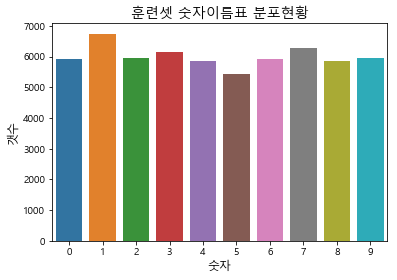

In [23]:
# 훈련 데이터셋 중 숫자이름표(타겟) 분포 그래프
ax = sns.barplot(x = 'number', y = 'frequency', data = y_tr_tb) 
ax.set_title('훈련셋 숫자이름표 분포현황', size = 14) 
ax.set_xlabel('숫자', size = 12) 
ax.set_ylabel('갯수', size = 12)

### 테스트 MNIST 데이터셋 조회

In [24]:
# 테스트 데이터셋 조회

data[1]
# - mnist에 들어 있는 데이터셋 전체를 data라는 단일객체로 로딩한 내용을 조회
# - data = mnist.load_data()

test
# - mnist에 들어 있는 데이터셋을 
#   train과 test라는 2개 객체로 분리해 로딩한 내용조회
# - (train, test) = mnist.load_data()

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [25]:
# 테스트 데이터셋 중 숫자이미지(피처) 조회

data[1][0]
# - mnist에 들어 있는 데이터셋 전체를 
#   data라는 단일객체로 로딩한 내용을 조회
# - data = mnist.load_data()

test[0]
# - mnist에 들어 있는 데이터셋을 
#   train과 test라는 2개 객체로 분리해 로딩한 내용조회
# - (train, test) = mnist.load_data()

X_test
# mnist에 들어 있는 데이터셋을 
# X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회
# - (X_train, y_train), (X_test, y_test) = mnist.load_data()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [26]:
# 테스트 데이터셋 중 숫자이름표(타겟) 조회

data[1][1]
# - mnist에 들어 있는 데이터셋 전체를 
#   data라는 단일객체로 로딩한 내용을 조회
# - data = mnist.load_data()

test[1]
# - mnist에 들어 있는 데이터셋을 
#   train과 test라는 2개 객체로 분리해 로딩한 내용조회
# - (train, test) = mnist.load_data()

y_test
# mnist에 들어 있는 데이터셋을 
# X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회
# - (X_train, y_train), (X_test, y_test) = mnist.load_data()

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [27]:
# 테스트 데이터셋 중 숫자이름표(타겟) 분포파악
y_tt_uq = np.unique(y_test)
print('테스트셋 숫자이름표(타겟) 유형:', y_tt_uq)

y_tt_bin = np.bincount(y_test)
print('테스트셋 숫자이름표(타겟) 유형별 빈도수:', y_tt_bin)

y_tt_por = [round(i / sum(y_tt_bin), 3) for i in y_tt_bin]
print('테스트셋 숫자이름표(타겟) 유형별 비율:', y_tt_por)

y_tt_tb = pd.DataFrame({'number': y_tt_uq, 
                        'frequency': y_tt_bin, 
                        'oportion': y_tt_por})
y_tt_tb

테스트셋 숫자이름표(타겟) 유형: [0 1 2 3 4 5 6 7 8 9]
테스트셋 숫자이름표(타겟) 유형별 빈도수: [ 980 1135 1032 1010  982  892  958 1028  974 1009]
테스트셋 숫자이름표(타겟) 유형별 비율: [0.098, 0.114, 0.103, 0.101, 0.098, 0.089, 0.096, 0.103, 0.097, 0.101]


,number,frequency,oportion
0,0,980,0.098
1,1,1135,0.114
2,2,1032,0.103
3,3,1010,0.101
4,4,982,0.098
5,5,892,0.089
6,6,958,0.096
7,7,1028,0.103
8,8,974,0.097
9,9,1009,0.101


Text(0, 0.5, '갯수')

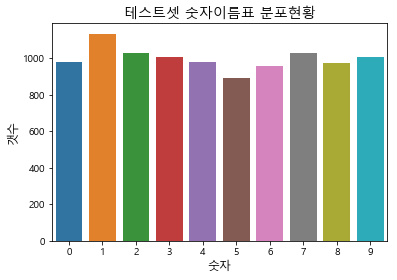

In [28]:
# 테스트 데이터셋 중 숫자이름표(타겟) 분포 그래프
ax = sns.barplot(x = 'number', y = 'frequency', data = y_tt_tb) 
ax.set_title('테스트셋 숫자이름표 분포현황', size = 14) 
ax.set_xlabel('숫자', size = 12) 
ax.set_ylabel('갯수', size = 12)

### 숫자이미지(피처) 출력

In [29]:
# 훈련셋 중 첫번째 숫자이미지 내용출력
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

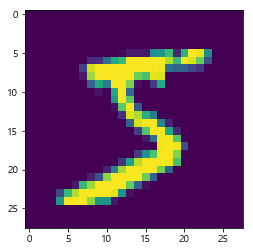

In [30]:
# 훈련셋 중 첫번째 숫자이미지 그래픽출력
plt.imshow(X_train[0])
# - 다차원 배열형식으로 가로28 X 세로28 = 총 784개 픽셀을 표현함
# - 화상(image) 데이터처럼 행과 열을 가진 행렬 형태의 2차원 데이터를 
#   imshow 함수로 2차원 행렬자료의 값을 색깔로 표시

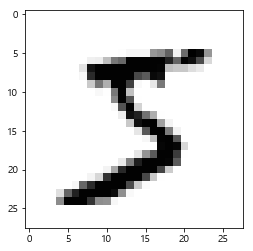

In [31]:
# 훈련셋 중 첫번째 숫자이미지 그래픽출력
plt.imshow(X_train[0], cmap = 'Greys')
# - 가로28 X 세로28 = 총 784개 픽셀로 구성된 이미지파일을
#   각 픽셀별 밝기정도를 나타내는 수치로 인식함
# - 각 픽셀별로 밝기 정도에 따라 흰색:0 ~ 검정:255까지 숫자가 있음
# - 보통 글씨가 작성된 픽셀은 1~255 중에서 하나의 밝기 수치를 가짐

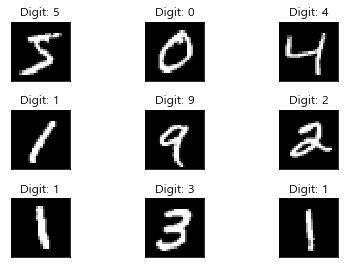

In [32]:
# 훈련셋 중 여러 개 숫자이미지 그래픽출력
fig = plt.figure()

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation = 'none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

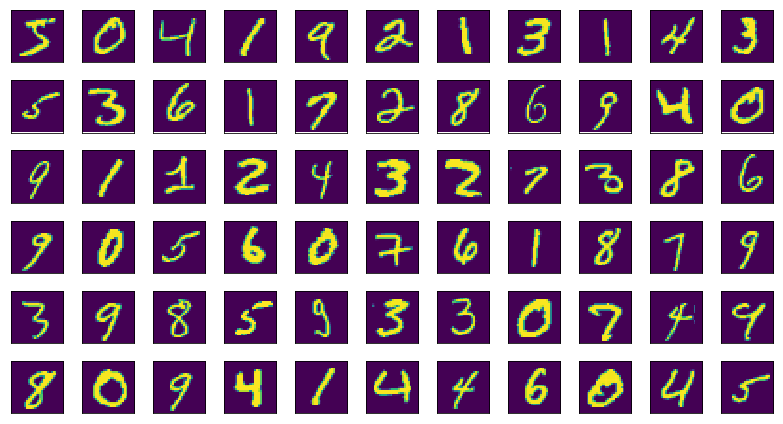

In [33]:
# 훈련셋 중 여러 개 숫자이미지 그래픽출력
plt.figure(figsize = (11, 6))

for i in range(66): 
    plt.subplot(6, 11, i + 1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [34]:
# 이미지데이터를 가로28 X 세로28 = 768픽셀 구조형식으로 출력하기 - 노 교재내용, 강사님코드

for x in X_train[0]: # 전체내용 중 1개 행씩 로딩
    for i in x:      # 1개 행에 속한 세부 열 요소를 하나씩 로딩
        print('{:3} '.format(i), end = '') # 해당 픽셀의 밝기정도 수치를 출력 
        #{:3}는 칸의 간격을 3칸씩 유지한다는 의미. 그래야 예쁘게 줄 맞춰서 잘 나온다
    print() # 1개 행 출력을 마치면 출력위치를 다음 행으로 이동

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [35]:
# 이미지데이터를 가로28 X 세로28 = 768픽셀 구조형식으로 출력하기 - 교재내용
import sys

for x in X_train[0]: # 전체내용 중 1개 행씩 로딩
    for i in x: # 1개 행에 속한 세부 열 요소를 하나씩 로딩
        sys.stdout.write('%d  ' % i) # 해당 픽셀의 밝기정도 수치를 출력
    sys.stdout.write('\n') # 1개 행 출력을 마치면 출력위치를 다음 행으로 이동

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18  18  18  126  136  175  26  166  255  247  127  0  0  0  0  
0  0  0  0  0  0  0  0  30  36  94  154  170  253  253  253  253  253  225  172  253  242  195  64  0  0  0  0  
0  0  0  0  0  0  0  49  238  253  253  253  253  253  253  253  253  251  93  82  82  56  39  0  0  0  0  0  
0  0  0  0  0  0  0  18  219  253  253  253  253  253  198  182  247  241  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80  156  107  253  253  205  11  0  43  154  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14  1  154  253

Text(0.5, 1.0, '숫자이미지의 픽셀분포 히스토그램')

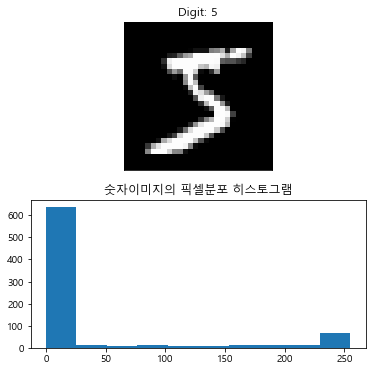

In [36]:
# 이미지 데이터 픽셀정보 분포파악
fig = plt.figure(figsize = (6, 6))

plt.subplot(2, 1, 1)
plt.imshow(X_train[0], cmap = 'gray', interpolation = 'none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])

# 어떤 색상이 많이 분포되어있는지 히스토그램으로 알아봄
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784)) # 위의 내용을 가로로 일렬로 만들어서 히스토그램 만든 것! reshape()
plt.title("숫자이미지의 픽셀분포 히스토그램")

픽셀 0의 수가 제일 많고 그다음 250이 크다

# <font color = 'blue'>데이터 전처리</font>

### 피처셋 구조변환: 숫자이미지의 2차원 배열데이터를 1차원 배열로 변환
* 숫자이미지 1개마다 (이미지갯수, 가로픽셀 , 세로픽셀)이라는 3차원 배열로 구성되어 있음
* 이중에서 이미지갯수는 개별 레코드/관찰치를 의미하므로 그대로 사용하면됨
* 각 이미지마다 가로28픽셀 X 세로28픽셀 구조의 2차원배열을 1차원 배열로 전환해서
<br>786개의 피처(입력/예측/독립)변수를 가진 개별 레코드/관찰치로 변환하는 것임

#### (참고) 다차원 배열의 구조변경 방법
* numpy라이브러리의 reshape() 함수를 이용해 다차원배열을 원하는 구조로 변경가능함

In [37]:
# 12개 요소를 가진 1차원 배열 생성 (1X1 구조)
a = np.array([0, 1, 2, 3, 4, 5, 6 ,7 ,8, 9, 10, 11])
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [38]:
print(type(a), a.shape)
# - 자료형은 numpy 다차원배열이며, 
#   12개 요소를 가로방향으로 12개 열에 걸쳐 가진 1차원(단일대괄호) 배열임

<class 'numpy.ndarray'> (12,)


#### 배열 요소갯수를 (가로행 X 세로열) 형태로 구현

In [39]:
a.reshape(1, 12)
# - 가로1행 X 세로12열 구조 => 2차원(중첩대괄호)배열 생성
# - 배열의 요소는 1개이며, 
#   그 요소안에 가로방향 12개 열 구조로 숫자가 담겨있음

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

-> 요소가 딱 한개 들어있고 그 안에, 즉 첫번째 요소에 12개 데이터가 다 들어가있는 구조.<br>
위의 아이들과 전혀 다른 구조이다!

In [40]:
a.reshape(12, 1)
# - 가로12행 X 세로1열 구조 => 2차원(중첩대괄호)배열 생성
# - 배열의 요소는 1개이며, 
#   그 요소안에 세로방향 12개 행 구조로 숫자가 담겨있음

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [41]:
a.reshape(2, 6)
# - 가로2행 X 세로6열 구조 => 2차원(중첩대괄호)배열 생성
# - 배열의 요소는 세로방향 2개 행이며, 
#   그 요소마다 가로방향 6개 열 구조로 숫자가 담겨있음

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

-> 이 아이는 2개의 요소 밖에 없고, 1개의 요소안에 0~5까지 존재, 2번째 요소안에는 6~11이 존재

In [42]:
a.reshape(4, 3)
# - 가로4행 X 세로3열 구조 => 2차원(중첩대괄호)배열 생성
# - 배열의 요소는 세로방향 4개 행이며, 
#   그 요소마다 가로방향 3개 열 구조로 숫자가 담겨있음

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

#### 인덱싱 번호 -1을 이용한 배열구조 변형

In [43]:
a.reshape(12)
# - 가로1행 X 세로12열 구조 => 1차원(단일대괄호)배열 생성
# - 배열의 요소는 세로방향 12개 열임 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [44]:
a.reshape(-12)
# - 가로1행 X 세로12열 구조 => 1차원(단일대괄호)배열 생성
# - 배열의 요소는 세로방향 12개 열임 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [45]:
a.reshape(-1)
# - 가로1행 X 세로12열 구조 => 1차원(단일대괄호)배열 생성
# - 배열의 요소는 세로방향 12개 열임 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [46]:
a.reshape(1, -1)
# - 가로1행 X 세로12열 구조 => 2차원(중첩대괄호)배열 생성
# - 배열의 요소는 가로방향 1개 행이며, 
#   그 요소안에 세로방향 12개 열 구조로 숫자가 담겨 있음 

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [47]:
a.reshape(-1, 1)
# - 가로12행 X 세로1열 구조 => 2차원(중첩대괄호)배열 생성
# - 배열의 요소는 가로방향 12개 행이며, 
#   그 요소마다 세로방향 1개 열 구조로 숫자가 담겨 있음 

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [48]:
a.reshape(4, -1)
# - 가로4행을 지정해 세로는 자동으로 3열 구조 => 2차원(중첩대괄호)배열 생성
# - 배열의 요소는 가로방향 4개 행이며, 
#   그 요소마다 세로방향 3개 열 구조로 숫자가 담겨 있음 

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [49]:
a.reshape(-1, 4)
# - 세로4열을 지정했으므로 가로는 자동으로 3행 구조 => 2차원(중첩대괄호)배열 생성
# - 배열의 요소는 가로방향 3개 행이며, 
#   그 요소마다 세로방향 4개 열 구조로 숫자가 담겨 있음 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

#### 숫자이미지(피처셋)의 2차원 픽셀배열을 1차원 배열로 변환

In [50]:
# 숫자이미지(피처) 훈련셋 데이터 배열구조와 규모 확인

print('훈련셋 데이터 객체유형:', type(X_train))
print('훈련셋 데이터 구조규모:', X_train.shape)
print('훈련셋 레코드 갯수:', X_train.shape[0])
print('훈련셋 가로픽셀 갯수', X_train.shape[1])
print('훈련셋 가로픽셀 갯수', X_train.shape[2])

# - 훈련셋 레코드 개수 60000개는 그대로 사용하면 됨
# - 2차원 배열형태의 가로 28픽셀과 세로 28픽셀을 1차원으로 변환하여
#   28 X 28 = 784개 피처개수로 만들면 됨
# - 즉 (60000, 28, 28) 구조의 3차원 배열을 (60000, 784) 구조의 2차원 배열로 변환이 필요함

훈련셋 데이터 객체유형: <class 'numpy.ndarray'>
훈련셋 데이터 구조규모: (60000, 28, 28)
훈련셋 레코드 갯수: 60000
훈련셋 가로픽셀 갯수 28
훈련셋 가로픽셀 갯수 28


In [51]:
# reshape() 함수를 이용한 숫자이미지(피처) 훈련셋 배열구조 변환

X_training = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

print('훈련셋 데이터 객체유형:', type(X_training))
print('훈련셋 데이터 구조규모:', X_training.shape)
print('훈련셋 레코드 갯수:', X_training.shape[0])
print('훈련셋 피처 갯수', X_training.shape[1])
print('\n훈련셋 피처 내용\n', X_training)

훈련셋 데이터 객체유형: <class 'numpy.ndarray'>
훈련셋 데이터 구조규모: (60000, 784)
훈련셋 레코드 갯수: 60000
훈련셋 피처 갯수 784

훈련셋 피처 내용
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
# 숫자이미지(피처) 테스트셋 데이터 배열구조와 규모 확인

print('테스트셋 데이터 객체유형:', type(X_test))
print('테스트셋 데이터 구조규모:', X_test.shape)
print('테스트셋 레코드 갯수:', X_test.shape[0])
print('테스트셋 가로픽셀 갯수', X_test.shape[1])
print('테스트셋 가로픽셀 갯수', X_test.shape[2])

# - 테스트셋 레코드 개수 10000개는 그대로 사용하면 됨
# - 2차원 배열형태의 가로 28픽셀과 세로 28픽셀을 1차원으로 변환하여
#   28 X 28 = 784개 피처개수로 만들면 됨
# - 즉 (10000, 28, 28) 구조의 3차원 배열을 (10000, 784) 구조의 2차원 배열로 변환이 필요함

테스트셋 데이터 객체유형: <class 'numpy.ndarray'>
테스트셋 데이터 구조규모: (10000, 28, 28)
테스트셋 레코드 갯수: 10000
테스트셋 가로픽셀 갯수 28
테스트셋 가로픽셀 갯수 28


In [53]:
# reshape() 함수를 이용한 숫자이미지(피처) 테스트셋 배열구조 변환

X_testing = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print('테스트셋 데이터 객체유형:', type(X_testing))
print('테스트셋 데이터 구조규모:', X_testing.shape)
print('테스트셋 레코드 갯수:', X_testing.shape[0])
print('테스트셋 피처 갯수', X_testing.shape[1])
print('\n테스트셋 피처 내용\n', X_testing)

테스트셋 데이터 객체유형: <class 'numpy.ndarray'>
테스트셋 데이터 구조규모: (10000, 784)
테스트셋 레코드 갯수: 10000
테스트셋 피처 갯수 784

테스트셋 피처 내용
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 피처셋 스케일링: 숫자이미지의 색상밝기 수치를 스케일링 실시
* 각 숫자이미지가 가진 0~255까지의 색상밝기 수치를 0~1사이로 스케일링 필요
* 보통 딥러닝 신경망 기법에서는 피처데이터를 0~1사이로 스케일링 한 데이터인 경우 최적성능을 보임

#### (참고) 다양한 스케일링 기법: 자료의 분포를 평균 0, 분산 1 형태로 변경 
* scale(): 기본 스케일. 평균과 표준편차 사용
* robust_scale(): 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
* minmax_scale(): 최대/최소값이 각각 1, 0이 되도록 스케일링
* maxabs_scale(): 최대절대값과 0이 각각 1, 0이 되도록 스케일링

In [54]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [55]:
a = [-7.0, -2.0, -1.0, 0, 1, 2, 3, 4, 5, 20]
a

[-7.0, -2.0, -1.0, 0, 1, 2, 3, 4, 5, 20]

In [56]:
df = pd.DataFrame({'a':a, 'scale(a)':scale(a), 'robust_scale(a)':robust_scale(a), 
                   'minmax_scale(a)':minmax_scale(a), 'maxabs_scale(a)':maxabs_scale(a)})
df

,a,scale(a),robust_scale(a),minmax_scale(a),maxabs_scale(a)
0,-7.0,-1.421716,-1.888889,0.000000,-0.35
1,-2.0,-0.673444,-0.777778,0.185185,-0.10
2,-1.0,-0.523790,-0.555556,0.222222,-0.05
3,0.0,-0.374136,-0.333333,0.259259,0.00
4,1.0,-0.224481,-0.111111,0.296296,0.05
5,2.0,-0.074827,0.111111,0.333333,0.10
6,3.0,0.074827,0.333333,0.370370,0.15
7,4.0,0.224481,0.555556,0.407407,0.20
8,5.0,0.374136,0.777778,0.444444,0.25
9,20.0,2.618951,4.111111,1.000000,1.00


#### 피처 스케일링: 숫자이미지의 0~255 색상밝기 수치를 0~1 사이로 변환
* sklearn라이브러리 preprocessing모듈의 minmax_scale() 함수를 이용해 최대/최소값이 각각 1, 0이 되도록 스케일링

In [57]:
# 숫자이미지 피처 중 훈련셋 스케일링
X_training_scaled = minmax_scale(X_training)

# 숫자이미지 피처 중 테스트셋 스케일링
X_testing_scaled = minmax_scale(X_testing)

In [58]:
print(f'훈련셋   기존 평균: {X_training.mean():6.3f}, 훈련셋   기존 표준편차: {X_training.std():6.3f}')
print(f'스케일링 실시 평균: {X_training_scaled.mean():6.3f}, 스케일링 실시 표준편차: {X_training_scaled.std():6.3f}')

훈련셋   기존 평균: 33.318, 훈련셋   기존 표준편차: 78.567
스케일링 실시 평균:  0.131, 스케일링 실시 표준편차:  0.308


In [59]:
print(f'테스트셋 기존 평균: {X_testing.mean():6.3f}, 테스트셋 기존 표준편차: {X_testing.std():6.3f}')
print(f'스케일링 실시 평균: {X_testing_scaled.mean():6.3f}, 스케일링 실시 표준편차: {X_testing_scaled.std():6.3f}')

테스트셋 기존 평균: 33.791, 테스트셋 기존 표준편차: 79.172
스케일링 실시 평균:  0.133, 스케일링 실시 표준편차:  0.310


### 타겟변수 원핫인코딩: 숫자이름표를 0과 1로 구성된 더미변수화
* 타겟변수가 다항 클래스인 경우 원핫인코딩으로 변경해 0과 1로 구성된 상태로 만들어야 딥러닝 연산이 가능해짐

In [60]:
# 타겟(출력/반응/종속)변수의 다항클래스인 숫자이름표 0~9까지를 0과 1로 구성된 이진데이터셋(더미변수화)으로 변형
from keras.utils import np_utils

In [61]:
# 숫자이름표(타겟) 훈련셋 원핫인코딩
y_train_ohe = np_utils.to_categorical(y_train)
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [62]:
# 숫자이름표(타겟) 테스트셋 원핫인코딩
y_test_ohe = np_utils.to_categorical(y_test)
y_test_ohe

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# <font color = 'blue'>딥러닝 모델링</font>

### 딥러닝 라이브러리 로딩

In [63]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense
# - 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌

### 랜덤 시드넘버 설정

In [64]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

### 딥러닝 모델계층 설정
* 입력층-하나의 은닉층-출력층을 가진 단순모델로 설정
<img src = './../../images/md_cnn_base.png'>

In [65]:
# 딥러닝 학습계층 시퀀스객체 로딩
md = Sequential()
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있는 Sequential()메서드를 md라는 객체로 로딩함

# 딥러닝 학습계층 설계
# - Dense() 객체로 학습계층별로 여러 개 노드가 밀집된 신경망을 구현함
# - 입력층(784개노드)-은닉층(512개노드)-출력층(10개노드)

md.add(Dense(512, input_dim = 784, activation = 'relu'))
# - 딥러닝 학습계층 1번째로 input_dim 으로 입력층 + 은닉층 역할 수행
# - input_dim은 피처셋의 예측(입력;독립)변수 갯수로 입력층에 784개 노드 지정
#   첫번째 레이어 이후로는 입력개수 지정 불필요
#   앞 레이어의 출력갯수가 이후 뒤 레이어의 입력개수가 됨
# - Dense 함수로 은닉층에 512개의 노드를 만듦
# - activation = 'relu'로 활성화함수 지정해 해당층의 학습결과를 다음층으로 넘김

md.add(Dense(10, activation = 'softmax'))
# - 딥러닝 학습계층 2번째로 출력층 역할
# - 출력값을 10개로 정해서 보여주기 위해서 10으로 설정함
# - activation = 'softmax'로 활성화함수 지정해 
#   최종적인 출력값을 0, 0, 1, 0, 0, 0, 0, 0, 0, 0 과 같은 원핫인코딩 방식으로 도출

# 딥러닝 계층구조 요약
md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 딥러닝 학습방법 설정

In [66]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'categorical_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 학습모델 파일저장 옵션 설정

In [67]:
# 딥러닝 학습모델 저장폴더명 설정
import os

md_dir = './model/'
if not os.path.exists(md_dir):
    os.mkdir(md_dir)
    
# 딥러닝 학습모델별 저장파일명 변경설정
md_path = './model/ep{epoch:d}_vloss{val_loss:.3f}_vacc{val_acc:.3f}.hdf5'
# - loss: 전체데이터 중 훈련셋(training) 학습오차
# - acc: 전체데이터 중 훈련셋(training) 정확도
# - val_loss: 전체데이터 중 검증셋(validation) 오차
# - val_acc: 전체데이터 중 검증셋(validation) 정확도

# ep{epoch:d} 단위배치(batch) 작업인 엑폭번호를 정수형으로 파일명 시작부분에 기록
# vloss{val_loss:.3f} 각 학습모델의 검증데이터 오차정도를 소수3자리까지 파일에 기록
# vacc{val_acc:.3f} 각 학습모델의 검증데이터 정확정도를 소수3째자리까지 파일에 기록

### 학습모델 체크포인트 옵션 설정

In [68]:
# 학습모델 체크포인트 모듈 로딩
from keras.callbacks import ModelCheckpoint

In [69]:
# 체크포인트(checkpoint) 변경설정
cp = ModelCheckpoint(filepath = md_path, 
                     monitor = 'val_loss', 
                     verbose = 1, 
                     save_best_only = True)
# - filepath: 각 학습모델별 성능평가 파일저장 경로
# - monitor 옵션: 각 학습모델별 성능평가 기준
#   * 전체데이터 중 훈련셋(training) 학습오차: loss
#   * 전체데이터 중 훈련셋(training) 정확도: acc
#   * 전체데이터 중 검증셋(validation) 오차: val_loss
#   * 전체데이터 중 검증셋(validation) 정확도: val_acc
#   * 전체데이터 중 시험셋(테스트; test)은 별도로 분할해 놓아야 함
# - verbose: 모델별 학습진행사항 출력
# - save_best_only: 각 학습모델별 성능평가 파일저장시
#                   이전 모델보다 성능이 좋아졌을 때만 저장하도록 함

### 학습모델 과적합 방지 옵션 설정

In [70]:
# 과적합 방지용 종료 메서드 로딩
from keras.callbacks import EarlyStopping

In [71]:
# 조기종료 옵션설정
es = EarlyStopping(monitor = 'val_loss', patience = 10)
# - monitor: 검증셋 대상 모니터할 값 설정
# - patience: 검증셋 오차가 좋아지지 않아도 몇 번까지 기다릴지 설정

### 딥러닝 모델에 데이터 피팅

In [72]:
# 딥러닝 모델 최적화 훈련진행
# - 준비된 훈련계층과 훈련방법에 따라 미니배치(mini-batch) 방식으로 최적화 훈련진행
# - 훈련데이터셋을 한번에 투입해 또는 한개 샘플씩 학습을 하지 않고, 
#   일부(batch_size) 단위샘플로 나누어서 부분적으로 학습을 진행함
# - 미니배치를 하나씩 학습모델에 투입해 손실함수값을 줄이기 위한 파라미터(가중치, 편향)를 조율해 나감
# - 각 미니배치별 손실함수값을 구하고, 이들의 평균적인 오차와 정확도를 해당 모델의 성능으로 판단함
# - 또한 미니배치 단위샘플을 모두 사용하는 일련의 학습과정(에포크: epoch)을 
#   한번에 끝내는 것이 아니라 여러차례 반복실시해 모델의 성능을 개선해 나감  

history = md.fit(X_training_scaled, y_train_ohe, 
                 epochs = 200, batch_size = 100, 
                 validation_split = 0.2, 
                 verbose = 1, 
                 callbacks = [cp, es])
# - 훈련셋을 100개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 200번 반복실시함

# - batch_size: 훈련데이터셋중에서 몇개 샘플을 미니배치(mini-batch)로 만들것인지 설정
#   적게설정: 빠른 훈련속도이점. 단위샘플셋에 따라 학습편차가 많이 발생. 병렬연산 못하고 하드웨어 자원낭비
#   많이설정: 훈련속도가 느려짐. 지역최소값(local minimum)에 빠질 수 있음. 하드웨어 자원에 부하가 많이 발생함)
# - epochs: 미니배치를 모두 처리하는 일련의 학습을 몇 번 정도 실시할지 설정
#   적게설정: 파라미터조율이 충분하지 않아서 과소적합 가능성
#   많이설정: 파라미터조율이 지나쳐 과대적합 가능성

# - validation_split = 0.2: 전체데이터중 훈련셋(training) 80%, 검증셋(validation) 20%로 분할하는 비율설정
# - callbacks 
#   [cp] 학습모델별 성능평가파일 생성방법 설정
#   [es] 딥러닝 과적합방지용 조기종료 옵션 설정

# 신경망 학습을 위한 데이터셋 3가지 유형
# - 훈련 데이터(training data): 매개변수(가중치와 편향) 학습
# - 검증 데이터(validation data): 하이퍼파라미터 성능 평가
# - 시험 데이터(test data): 신경망의 범용 성능 평가

# - validation_split = 0.2 대신에 별도 피처&타겟셋을 입력할 수 있음
# - validation_data = (X_testing_scaled, y_test_ohe)로 설정하면
#   시험셋을 검증용으로 투입한 것으로 볼 수 있음

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 8s 164us/step - loss: 0.2782 - acc: 0.9203 - val_loss: 0.1466 - val_acc: 0.9583

Epoch 00001: val_loss improved from inf to 0.14656, saving model to ./model/ep1_vloss0.147_vacc0.958.hdf5
Epoch 2/200
48000/48000 [==============================] - 10s 211us/step - loss: 0.1134 - acc: 0.9664 - val_loss: 0.1002 - val_acc: 0.9691

Epoch 00002: val_loss improved from 0.14656 to 0.10021, saving model to ./model/ep2_vloss0.100_vacc0.969.hdf5
Epoch 3/200
48000/48000 [==============================] - 9s 179us/step - loss: 0.0724 - acc: 0.9793 - val_loss: 0.0897 - val_acc: 0.9729

Epoch 00003: val_loss improved from 0.10021 to 0.08968, saving model to ./model/ep3_vloss0.090_vacc0.973.hdf5
Epoch 4/200
48000/48000 [==============================] - 10s 201us/step - loss: 0.0525 - acc: 0.9850 - val_loss: 0.0871 - val_acc: 0.9743

Epoch 00004: val_loss improved from 0.08968 to 0.08709, saving

# <font color = 'blue'>딥러닝 모델 성능평가</font>

### 딥러닝 학습모델 성능평가 히스토리

In [73]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 확보

# 훈련셋(training) 학습성능
y_loss = history.history['loss'] # 훈련셋 오차
y_acc = history.history['acc'] # 훈련셋 정확도

# 검증셋(validation) 학습성능
y_vloss = history.history['val_loss'] # 검증셋 오차
y_vacc = history.history['val_acc'] # 검증셋 정확도

In [74]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 객체형식과 규모
print(type(y_loss), len(y_loss))
print(type(y_acc), len(y_acc))
print(type(y_vloss), len(y_vloss))
print(type(y_vacc), len(y_vacc))

<class 'list'> 17
<class 'list'> 17
<class 'list'> 17
<class 'list'> 17


### 딥러닝 학습모델 성능평가 그래프

In [75]:
# x축 설정
# - epochs = 200에 의해서 딥러닝 학습모델이 200개 만들어저 진행됨에 따라
#   학습오차, 학습정확도, 검증오차, 검증정확도가 모두 200개 값이 생성됨
# - 그런데, callbacks = [cp, es] 파라미터 설정으로 
#   개선된 베스트모델&과적합방지 학습모델에 대해서만 제한적으로  
#   학습오차, 학습정확도, 검증오차, 검증정확도가 기록됨  
#   [cp] 학습모델별 성능평가파일 생성시 
#        이전파일보다 성능이 개선된 베스트모델을 저장옵션
#   [es] 딥러닝 과적합방지용 조기종료 옵션 
x_len = np.arange(len(y_acc))
x_len

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

#### 훈련셋 딥러닝학습 오차과 정확도 추이

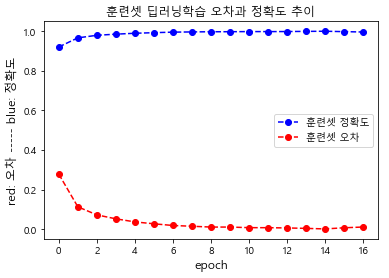

In [76]:
# 훈련셋 딥러닝학습 오차와 정확도 추이
plt.plot(x_len, y_acc, 'bo--', label = '훈련셋 정확도')
plt.plot(x_len, y_loss, 'ro--', label = '훈련셋 오차')
plt.title('훈련셋 딥러닝학습 오차과 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션 'bo--', 'ro--'
# --> color = 'blue', marker = 'o', linestyle = '--' 의미임
# --> color = 'red', marker = 'o', linestyle = '--' 의미임

best모델만 저장하다보니 epoch의 갯수가 17개가 나온 것

#### 테스트셋 딥러닝학습 오차과 정확도 추이

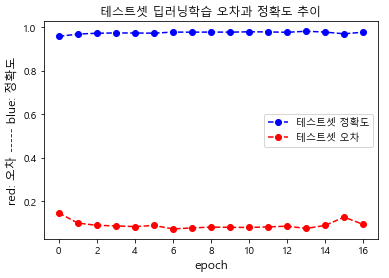

In [77]:
# 테스트셋 딥러닝학습 오차과 정확도 추이
plt.plot(x_len, y_vacc, 'bo--', label = '테스트셋 정확도')
plt.plot(x_len, y_vloss, 'ro--', label = '테스트셋 오차')
plt.title('테스트셋 딥러닝학습 오차과 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

#### 딥러닝학습 훈련셋과 검증셋 오차 추이

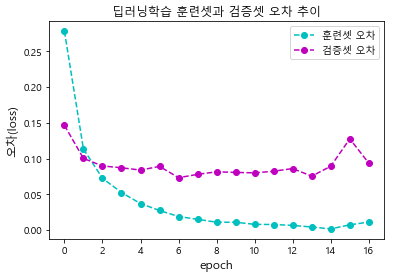

In [78]:
# 딥러닝학습 훈련셋과 검증셋 오차 추이
plt.plot(x_len, y_loss, 'co--', label = '훈련셋 오차')
plt.plot(x_len, y_vloss, 'mo--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋과 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('오차(loss)', size = 12)
plt.legend()

# 마커설정 옵션 'co--', 'mo--'
# --> color = 'cyan', marker = 'o', linestyle = '--' 로 풀어서 코딩가능
# --> color = 'magenta', marker = 'o', linestyle = '--' 로 풀어서 코딩가능

#### 딥러닝학습 훈련셋과 테스트셋 정확도 추이

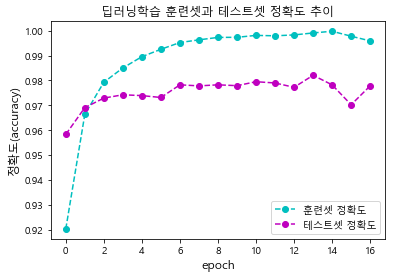

In [79]:
# 딥러닝학습 훈련셋과 테스트셋 정확도 추이
plt.plot(x_len, y_acc, 'co--', label = '훈련셋 정확도')
plt.plot(x_len, y_vacc, 'mo--', label = '테스트셋 정확도')
plt.title('딥러닝학습 훈련셋과 테스트셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('정확도(accuracy)', size = 12)
plt.legend()

#### 훈련셋 정확도와 검증셋 오차 추이
* 훈련셋의 정확도는 에포크(epoch)가 실행될 수록 좋아짐
* 반면에 검증셋의 오차는 에포크가 실행될 수록 더이상 좋아지지 않음
* 따라서 에포크(epoch) 회수를 통해 적정한 딥러닝 모델학습 지정이 필요함 
* 학습이 진행될수록 훈련셋의 정확도는 올라가지만, 
<br>과적합으로 인해 검증셋의 학습결과는 점점 나빠지게 됨
<img src = './../../images/train_validation.png'>

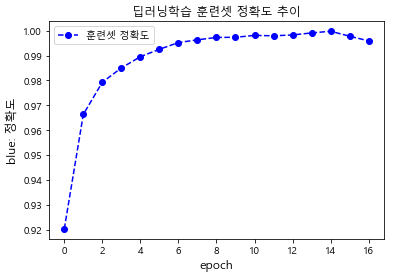

In [80]:
# 훈렷셋 딥러닝학습 정확도 추이
plt.plot(x_len, y_acc, color = 'blue', 
         marker = 'o', linestyle = '--', label = '훈련셋 정확도')
plt.title('딥러닝학습 훈련셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('blue: 정확도', size = 12)
plt.legend()

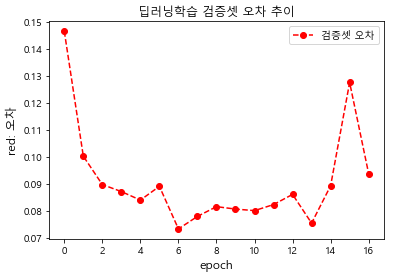

In [81]:
# 검증셋 딥러닝학습 오차 추이
plt.plot(x_len, y_vloss, color = 'red', 
         marker = 'o', linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차', size = 12)
plt.legend()

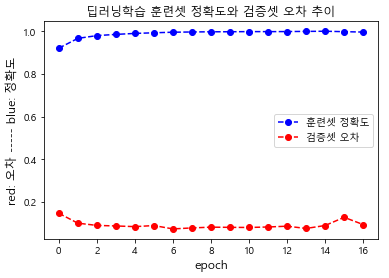

In [82]:
# 훈련셋 정확도와 검증셋 오차 추이
plt.plot(x_len, y_acc, color = 'blue', marker = 'o', 
         linestyle = '--', label = '훈련셋 정확도')
plt.plot(x_len, y_vloss, color = 'red', marker = 'o', 
         linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋 정확도와 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션: color = 'red', marker = 'o', linestyle = '--'
# --> 'ro--'로 축약해서 설정가능함

### 모델 성능평가

#### 훈련셋(train) 성능평가

In [83]:
# 훈련셋을 활용한 딥러닝모델의 성능평가 결과
train_perf = md.evaluate(X_training_scaled, y_train_ohe)
train_perf

60000/60000 [==============================] - 7s 109us/step


[0.02307962768615762, 0.9944333333333333]

In [84]:
print('훈련셋 모델성능 종합:', [round(i, 3) for i in train_perf])
print(f'훈련셋 모델성능 오차(loss): {train_perf[0]:11.3f}')
print(f'훈련셋 모델성능 정확도(accuracy): {train_perf[1]:0.3f}')

훈련셋 모델성능 종합: [0.023, 0.994]
훈련셋 모델성능 오차(loss):       0.023
훈련셋 모델성능 정확도(accuracy): 0.994


#### 테스트셋(test) 성능평가

In [85]:
# 테스트셋을 활용한 딥러닝모델의 성능평가 결과
test_perf = md.evaluate(X_testing_scaled, y_test_ohe)
test_perf

10000/10000 [==============================] - 1s 123us/step


[0.07880296427702306, 0.98]

In [86]:
print('테스트셋 모델성능 종합:', [round(i, 3) for i in test_perf])
print(f'테스트셋 모델성능 오차(loss): {test_perf[0]:11.3f}')
print(f'테스트셋 모델성능 정확도(accuracy): {test_perf[1]:0.3f}')

테스트셋 모델성능 종합: [0.079, 0.98]
테스트셋 모델성능 오차(loss):       0.079
테스트셋 모델성능 정확도(accuracy): 0.980


#### 훈련셋과 테스트셋 성능평가 비교

In [87]:
# 오차(loss) 비교
diff_loss = test_perf[0] - train_perf[0] 

# 정확도(accuracy) 비교
diff_acc = test_perf[1] - train_perf[1] 

In [88]:
print(f'[오차      (loss)] 훈련셋: {train_perf[0]:0.3f}, 테스트셋: {test_perf[0]:0.3f}, 차이: {diff_loss:0.3f}')
print(f'[정확도(accuracy)] 훈련셋: {train_perf[1]:0.3f}, 테스트셋: {test_perf[1]:0.3f}, 차이: {diff_acc:0.3f}')

[오차      (loss)] 훈련셋: 0.023, 테스트셋: 0.079, 차이: 0.056
[정확도(accuracy)] 훈련셋: 0.994, 테스트셋: 0.980, 차이: -0.014


### 혼동표 분석

In [89]:
# 실제 테스트셋 숫자이름표
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [90]:
# 딥러닝모델의 예측 숫자이름표 
md_y_pred = md.predict_classes(X_testing_scaled)
md_y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [91]:
# sklearn 성능평가 모듈 로딩
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [92]:
# 실제y값과 예측y값 간의 혼동표 생성
cm = confusion_matrix(y_test, md_y_pred)
cm

array([[ 967,    1,    1,    0,    2,    1,    3,    1,    2,    2],
       [   0, 1126,    4,    0,    0,    0,    1,    1,    3,    0],
       [   3,    0, 1019,    2,    0,    0,    2,    1,    5,    0],
       [   0,    0,    9,  975,    0,    6,    0,    3,    6,   11],
       [   0,    2,    5,    0,  956,    0,    3,    0,    2,   14],
       [   1,    0,    0,    7,    0,  872,    4,    0,    4,    4],
       [   1,    2,    2,    1,    4,    5,  942,    0,    1,    0],
       [   1,    3,   16,    3,    1,    0,    0,  991,    4,    9],
       [   1,    1,    2,    3,    2,    2,    1,    2,  955,    5],
       [   0,    3,    0,    1,    3,    3,    0,    2,    0,  997]],
      dtype=int64)

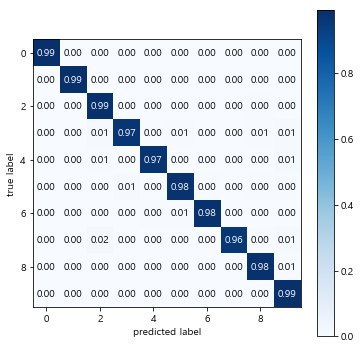

In [93]:
# 혼동표 시각화
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat = cm,
                                colorbar = True,
                                show_absolute = False,
                                show_normed = True,
                                figsize = (6, 6))

In [94]:
# 혼동표 성능분석
print(classification_report(y_test, md_y_pred,
                            target_names=['0', '1', '2', '3', '4', '5',
                                          '6', '7', '8', '9']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.96      0.99      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### 정분류 & 오분류 샘플 확인

In [95]:
# 실제 테스트셋 숫자이름표
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [96]:
# 딥러닝모델의 예측 숫자이름표 
md_y_pred = md.predict_classes(X_testing_scaled)
md_y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [97]:
# 정분류된 숫자이름표, 오분류된 숫자이름표 확보
correct_indices = np.nonzero(md_y_pred == y_test)[0]
incorrect_indices = np.nonzero(md_y_pred != y_test)[0]
print()
print(f'정분류된 숫자이름표 갯수: {len(correct_indices):d}')
print(f'오분류된 숫자이름표 갯수: {len(incorrect_indices):4d}')


정분류된 숫자이름표 갯수: 9800
오분류된 숫자이름표 갯수:  200


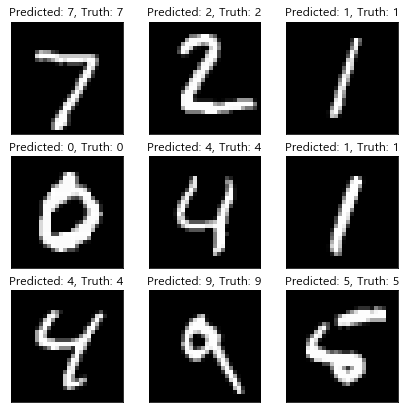

In [98]:
# 정분류된 9개 이미지 샘플 확인
fig = plt.figure(figsize = (7, 7))

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap = 'gray', interpolation = 'none')
    plt.title(
      "Predicted: {}, Truth: {}".format(md_y_pred[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

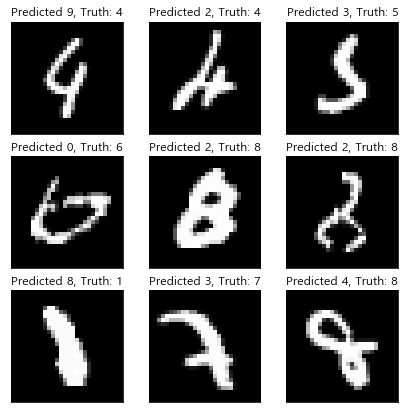

In [99]:
# 오분류된 9개 이미지 샘플 확인
fig = plt.figure(figsize = (7, 7))

for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap = 'gray', interpolation = 'none')
    plt.title(
      "Predicted {}, Truth: {}".format(md_y_pred[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

# End of Source